In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
mnist['data'].shape

(70000, 784)

In [4]:
mnist['target'].shape

(70000,)

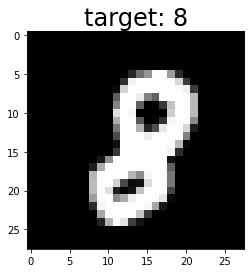

In [9]:
idx = np.random.randint(mnist['data'].shape[0])
img = mnist['data'][idx,:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.title(f"target: {mnist['target'][idx]}", size=24)
plt.show()

In [12]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.3, random_state=0)

In [13]:
train_lbl.shape

(49000,)

In [14]:
test_lbl.shape

(21000,)

In [15]:
test_img.shape

(21000, 784)

## 1er modelo -> C=1e-6

In [17]:
model_1 = LogisticRegression(C=1e-6, max_iter=1000)

In [18]:
model_1.fit(train_img, train_lbl)

LogisticRegression(C=1e-06, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
model_1.coef_.shape

(10, 784)

In [20]:
model_1.intercept_.shape

(10,)

In [21]:
test_img[0], test_lbl[0]

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  89., 147., 147., 249., 230.,  59.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [22]:
test_img[:10].shape

(10, 784)

In [23]:
score = model_1.score(test_img, test_lbl)
score

0.9189047619047619

In [24]:
lbl_pred = model_1.predict(test_img)
cm = confusion_matrix(test_lbl, lbl_pred)

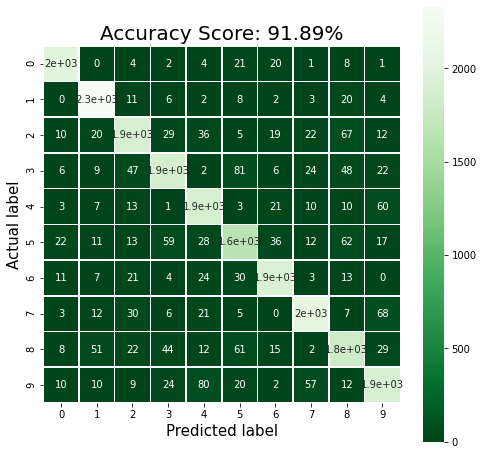

In [65]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,2)}%', size = 20)
plt.show()

### 2do modelo -> C=1e-*7*

In [30]:
model_2 = LogisticRegression(C=1e-7, max_iter=1000)

In [31]:
model_2.fit(train_img, train_lbl)

LogisticRegression(C=1e-07, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model_2.n_iter_

array([255], dtype=int32)

In [34]:
score_2 = model_2.score(test_img, test_lbl)
score_2

0.9086666666666666

In [35]:
lbl_pred_2 = model_2.predict(test_img)
cm_2 = confusion_matrix(test_lbl, lbl_pred)

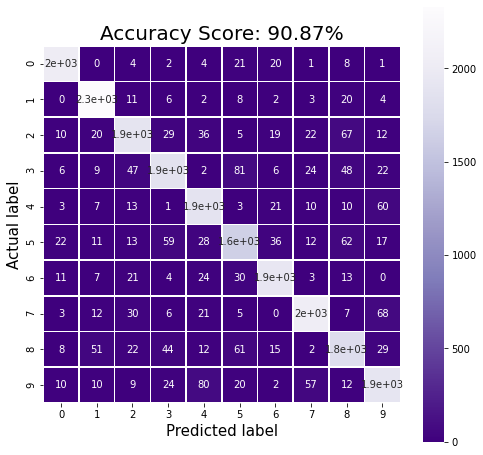

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_2, annot=True, linewidths=.5, square = True, cmap = 'Purples_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score_2,2)}%', size = 20)
plt.show()

### 3er modelo -> C=1e-4

In [41]:
model_3 = LogisticRegression(C=1e-4, max_iter=30000)

In [42]:
model_3.fit(train_img, train_lbl)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=30000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model_3.n_iter_

array([10857], dtype=int32)

In [44]:
score_3 = model_3.score(test_img, test_lbl)
score_3

0.9136666666666666

In [45]:
lbl_pred_3 = model_3.predict(test_img)
cm_3 = confusion_matrix(test_lbl, lbl_pred)

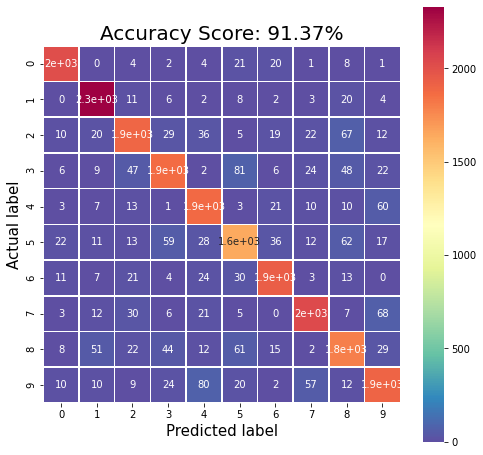

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_3, annot=True, linewidths=.5, square = True, cmap = 'Spectral_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score_3,2)}%', size = 20)
plt.show()

### 4er modelo -> C=1e-5

In [53]:
model_4 = LogisticRegression(C=1e-5, max_iter=10000)

In [54]:
model_4.fit(train_img, train_lbl)

LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
model_4.n_iter_

array([3527], dtype=int32)

In [56]:
score_4 = model_4.score(test_img, test_lbl)
score_4

0.9188571428571428

In [57]:
lbl_pred_4 = model_4.predict(test_img)
cm_4 = confusion_matrix(test_lbl, lbl_pred)

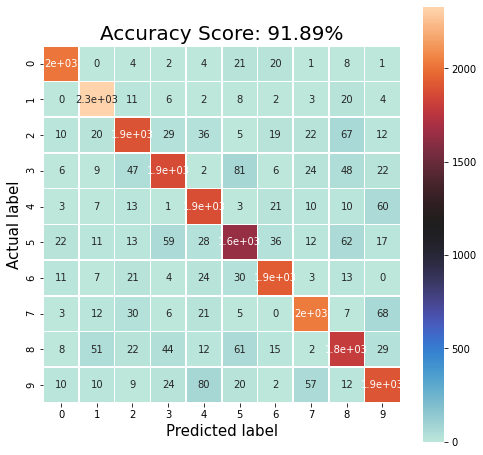

In [66]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_4, annot=True, linewidths=.5, square = True, cmap = 'icefire');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score_4,2)}%', size = 20)
plt.show()